In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        # Number of samples and features
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for _ in range(self.iterations):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid function
            y_predicted = self.sigmoid(linear_model)
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

# Example usage:
if __name__ == "__main__":
    # Import dataset
    
    # Load dataset
    data = load_breast_cancer()
    X, y = data.data, data.target
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Initialize and train model
    model = LogisticRegression(learning_rate=0.01, iterations=1000)
    model.fit(X_train, y_train)
    
    # Predictions
    predictions = model.predict(X_test)
    
    # Evaluate model
    print(f"Accuracy: {accuracy_score(y_test, predictions)}")

Accuracy: 0.9824561403508771


#### Implement logistic regression from scratch using Numpy.

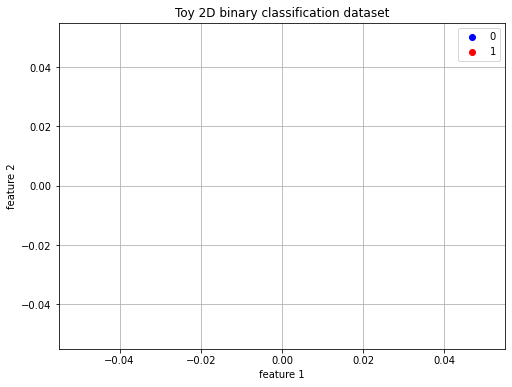

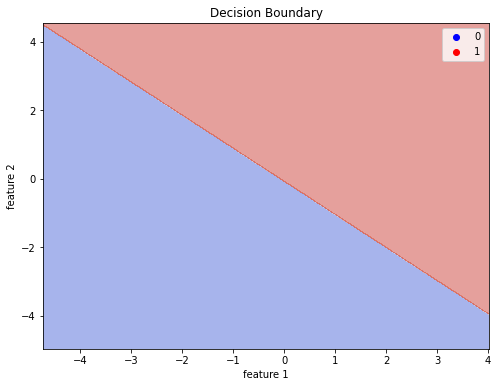

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate toy 2D binary classification dataset
np.random.seed(42)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
y = [0] * 20 + [1] * 20

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.grid(True)
plt.title('Toy 2D binary classification dataset')
plt.show()

# Logistic Regression Class
class LogisticRegression:
    def __init__(self, learning_rate=0.1, n_iterations=2000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        return np.round(self.sigmoid(model))

# Train and test the model
model = LogisticRegression(learning_rate=0.1, n_iterations=1000)
model.fit(X, y)
predictions = model.predict(X)

# Visualize the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = model.predict(grid).reshape(xx1.shape)

plt.contourf(xx1, xx2, probs, alpha=0.5, cmap='coolwarm')
plt.title('Decision Boundary')
plt.legend()
plt.show()